<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Herramientas%20de%20Modelaci%C3%B3n/Taller_Fenics_entregable_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fenix_checker

In [ ]:
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

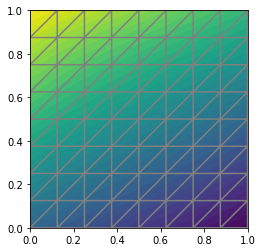

In [ ]:
%matplotlib inline
# Punto 2 Ejercicio 1
"""

  -Laplace(u) + 2u = f    in the unit square
            u = u_D  on the boundary

  u_D = 0.5 + 8y -4x
    f = 3
"""

from fenics import *
import matplotlib.pyplot as plt

# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('0.5 + 8*x[1] - 4*x[0]', degree=1)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(3)
a = dot(grad(u), grad(v))*dx + 2*u*v*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution and mesh
plot(u)
plot(mesh)

# Save solution to file in XDMF format
xdmffile = XDMFFile('poisson/ejercicio1.xdmf')
xdmffile.write(u)
xdmffile.close()

# Hold plot

plt.show()

Se evidencia que la zona donde u es mayor es en la diagonal superior izquierda, es decir, en las coordenadas x=1.0 & y=0.0. Por otro lado las coordenadas con un menor valor de u son x=0.0 & y=1.0. Adicionalmente, se logra ver que el crecimiento es diagonal con pendiente 1.

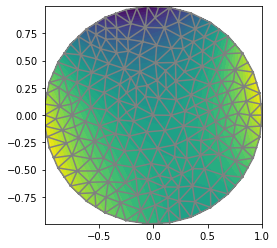

In [ ]:
%matplotlib inline
# Punto 2 Ejercicio 2

"""

  -Laplace(u) + 3u = f    in the unit square
            u = u_D  on the boundary

  u_D = xy +2x^2 - y^3
    f = 1
"""

from fenics import *
import matplotlib.pyplot as plt
from mshr import *

# Create mesh and define function space
domain= Circle(Point(0,0),1)
mesh = generate_mesh(domain, 10)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('x[0]*x[1] + 2*x[0]*x[0] - x[1]*x[1]*x[1]', degree=3)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(1)
a = dot(grad(u), grad(v))*dx + 3*u*v*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution and mesh
plot(u)
plot(mesh)

# Save solution to file in XDMF format
xdmffile = XDMFFile('poisson/ejercicio1.xdmf')
xdmffile.write(u)
xdmffile.close()

# Hold plot
plt.show()

Se evidencia que la zona donde u es mayor es al cercano a las coordenadas x=-1.0 & y=-0.37. Asimismo, también un punto alto en la gráfica es en el cercano al punto (1.0, 0.12). Por otro lado las coordenadas con un menor valor de u son cercanas a x=-0.2 & y=1.0. Adicionalmente, se logra ver que el parece tener comportamiento de silla de montar.

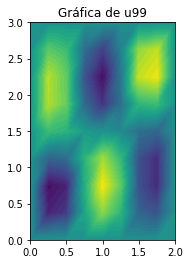

In [ ]:
%matplotlib inline
# Taller 2 Punto 1

#from __future__ import print_function
from fenics import *
import numpy as np
import matplotlib.pyplot as plt

T = 3.0            # final time
num_steps = 100     # number of time steps
dt = T / num_steps # time step size

# Create mesh and define function space
nx = ny = 8
mesh = RectangleMesh(Point(0,0),Point(2,3),nx, ny)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
#u_D = Constant(0)

def boundary(x, on_boundary):
    return on_boundary


u_0 = Expression('x[0] + x[1]',
                 degree=1)

bc = DirichletBC(V, u_0, boundary)
# Define initial value
u_n = interpolate(u_0, V)
#u_n = project(u_D, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(3)

F = u*v*dx - dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

# Create XDMF file for saving solution
xdmffile = XDMFFile('heat/solution-Taller2Punto1.xdmf')

# Time-stepping
u = Function(V)
t = 0

for n in range(num_steps):
    #print('{} out of {}'.format(n, num_steps))

    # Update current time
    t += dt
    u_D.t = t

    # Compute solution
    solve(a == L, u, bc)

    # Save to file and plot solution
    xdmffile.write(u, t)
    plot(u, title=f'Gráfica de u{n}')
    plt.savefig(f'foto{n}.jpg')
    # Update previous solution
    u_n.assign(u)

xdmffile.close()

In [ ]:
import cv2

imgs=[]
for i in range(num_steps):
  imgs.append(cv2.imread(f'foto{i}.jpg'))

alto, ancho = imgs[0].shape[:2]
video=cv2.VideoWriter('Video Prueba.mp4', cv2.VideoWriter.fourcc(*'mp4v'), 2, (ancho, alto))

for i in imgs:
  video.write(i)

video.release()